# Inverse Transform method


### Rationale

Otherwise known as inverse CDF method. The continuous case:


Suppose that we have a continuous random variable $X$ having Cummulative Density Function (CDF) $F_{X}$. Then, the random variable 

$$
U = F_{X}(X) 
$$


has a Uniform distribution $U \sim U_{[0, 1]}$. So to generate a random variate $x$ from the distribution of $X$, we can use the following transformation

$$
F_{X}^{-1}(U) = x
$$


where $F_{X}^{-1}(.)$ is the inverse CDF or quantile function.


### Weibull example

We want to generate a sample of $10,000$ random realizations from a Weibull distribution $W(5, 2)$ using the Inverse CDF method.


If $X \sim\mathcal{W}ei(\alpha, \beta)$ having PDF and CDF defined respectively as

$$
\begin{align*}
& \textbf{PDF}   \ \ \ \ \   f_{X}(x) = \frac{  \alpha   }{ \beta }     \bigg(  \frac{ x  }{ \beta }\bigg)^{\alpha - 1}      exp \bigg( - \frac{ x  }{ \beta } \bigg)^{\alpha }  \ \one_{\mathbb{R_{
}^{+}}}(x)  \\
& \textbf{CDF}  \ \ \ \ \ F_{X}(x) = 1 - exp \bigg( - \frac{x}{\beta} \bigg)^{\alpha}  \\
\end{align*}
$$


### Weibull example solve

Then by the Inverse CDF method, we can generate realizations of $X$ by equating $U = F_{X}(x)$ and solving for $x$. We have

$$
\begin{align*}
 U & = 1 - exp \bigg(-  \frac{x}{2} \bigg)^{5} \\
1 -  U & =  exp \bigg( - \frac{x}{2} \bigg)^{5} \\
 - ln (1 -  U ) &=  \bigg( \frac{x}{2} \bigg)^{5} \\
  \big(- ln (1 -  U ) \big)^{1/5 } & =  \frac{x}{2}  \\
2 \big(- ln (1 -  U ) \big)^{1/5} & =  x  \\
\end{align*}
$$

Next up: Python program.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#--------------------------------
# example 1: Weibull realizations
#--------------------------------

# 1. Define Inverse CDF function
def Inverse_CDF_Weibull(n, alpha, beta) :
        u = np.random.uniform(low=0.0, high=1.0, size=n)          # generate uniform numbers
        data = beta*((-np.log(1-u))**(1/alpha))                   # forumla derived
        
        return pd.DataFrame(data = data, columns = ['data'])      # return a data frame instead of an arry

# 2. Generate realizations of the desired distribution
np.random.seed(2023)
dataset = Inverse_CDF_Weibull(n = 1000, alpha = 5, beta = 2)
dataset.head()

,data
0,1.655497
1,2.343973
2,1.952544
3,1.340683
4,1.372833


[Text(0.5, 0, 'value')]

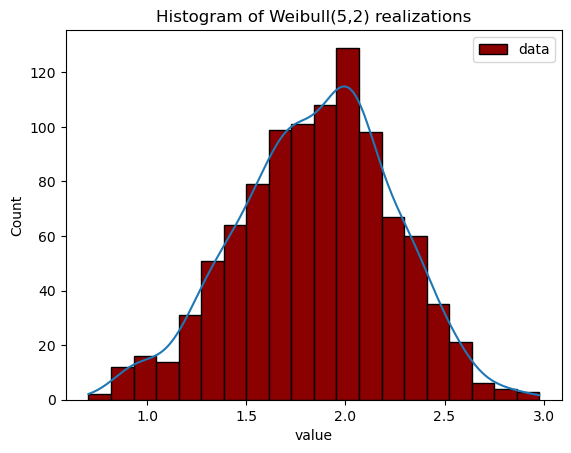

In [3]:
# 3. Plot with seabortn
plot = sns.histplot(dataset, kde = True, bins = 20, facecolor="darkred", edgecolor='black')
plot.set(title='Histogram of Weibull(5,2) realizations')
plot.set(xlabel="value")

###  References


Rizzo, M.L. (2019). Statistical Computing with R, Second Edition (2nd ed.). Chapman and Hall/CRC. 
https://doi.org/10.1201/9780429192760


Python:
{https://www.python.org/